In [82]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print('Imports done')

Imports done


In [0]:
np.random.seed(0)

In [84]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


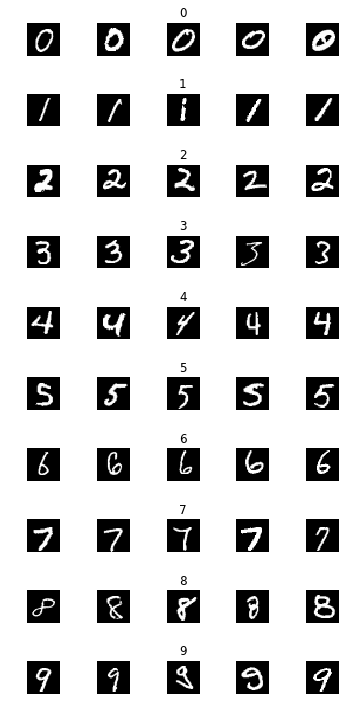

In [85]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


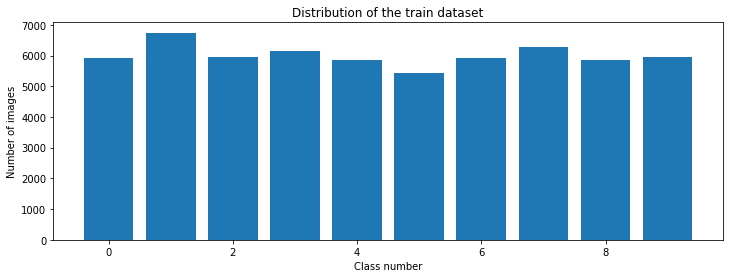

In [86]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:



y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
#we will define the Lenet model
def leNet_model():
  model= Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [90]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5010      
Total para

In [91]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2684 - acc: 0.9198 - val_loss: 0.0595 - val_acc: 0.9817
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0536 - acc: 0.9834 - val_loss: 0.0525 - val_acc: 0.9862
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0566 - val_acc: 0.9840
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0358 - acc: 0.9885 - val_loss: 0.0456 - val_acc: 0.9872
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0315 - acc: 0.9895 - val_loss: 0.0491 - val_acc: 0.9868
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0287 - acc: 0.9905 - val_loss: 0.0465 - val_acc: 0.9892
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0225 - acc: 0.9930 - val_loss: 0.0417 - val_acc:

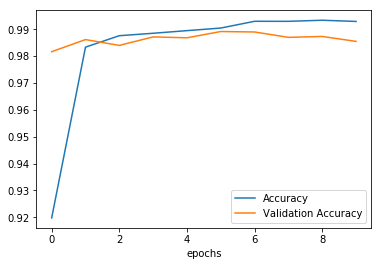

In [92]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.legend(['Accuracy', 'Validation Accuracy'])

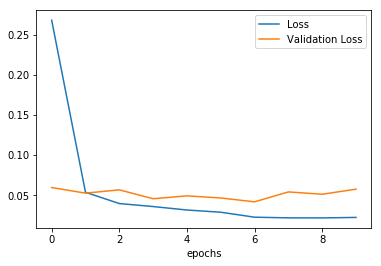

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.legend(['Loss', 'Validation Loss'])

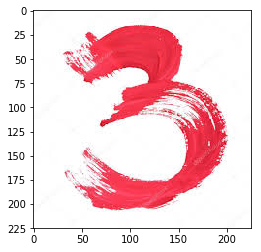

In [94]:
import requests
from PIL import Image
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)

img=Image.open(response.raw)
plt.imshow(img)

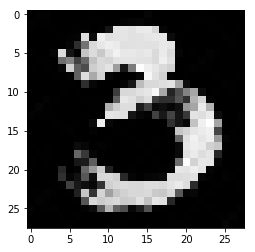

In [95]:
import cv2
img_array =  np.asarray(img)
resized_img=cv2.resize(img_array, (28,28))
gray_img=cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [0]:
image = image/255
image = image.reshape(1,28,28,1)

In [97]:
prediction =  model.predict_classes(image)
print("Prediction image is ", str(prediction))

Prediction image is  [3]


In [98]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score: {}'.format(score[0]))
print('Test Accuracy: {}'.format(score[1]))

<class 'list'>
Test Score: 0.05333026966655384
Test Accuracy: 0.9865


In [99]:
layer1=Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2=Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


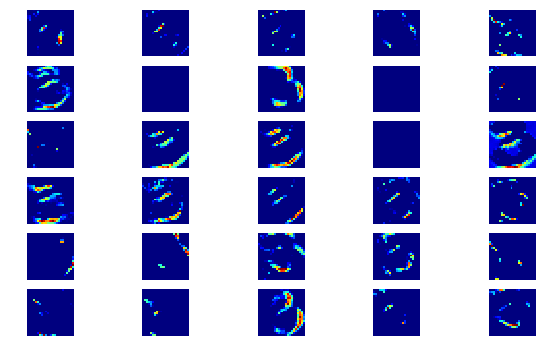

In [100]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  

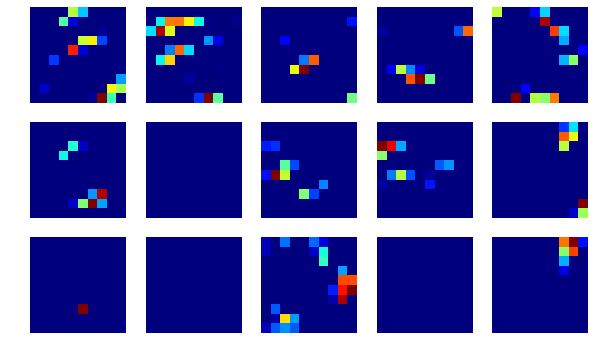

In [101]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  